February 21, 2016: initial sklearn development

---

There isn't that much to port over. Mostly just the main classes, since that cannot be translated. We'll have opportunities to use the new PyCall in some cases, at least.

In [1]:
using NBInclude

In [12]:
ex_dir = "../examples/"
for fname in readdir(ex_dir)
    path = ex_dir * fname
    if endswith(fname, ".ipynb")
        @eval module Testing
        println($path)
            using NBInclude
        nbinclude($path)
        end
end
end

../examples/Classifier_Comparison.ipynb


../examples/Classifier_Comparison_Julia.ipynb


../examples/Clustering_Comparison.ipynb
../examples/Cross_Validated_Predictions.ipynb


//anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
//anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
//anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  

../examples/Decision_Tree_Regression.ipynb
../examples/Decision_Tree_Regression_Julia.ipynb


../examples/Density_Estimation.ipynb
../examples/Density_Estimation_Julia.ipynb


//anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multiva

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       7.850874e+03
      1       5.165666e+03      -2.685208e+03 |        0
      2       5.165666e+03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 5165.666163455702)


LoadError: LoadError: LoadError: MethodError: Cannot `convert` an object of type Array{Pair{Symbol,Int64},1} to an object of type Dict{Symbol,Any}
This may have arisen from a call to the constructor Dict{Symbol,Any}(...),
since type constructors fall back to convert methods.
while loading /Users/cedric/.julia/v0.5/ScikitLearn/examples/Density_Estimation_Julia.ipynb:In[6], in expression starting on line 1
while loading In[12], in expression starting on line 2

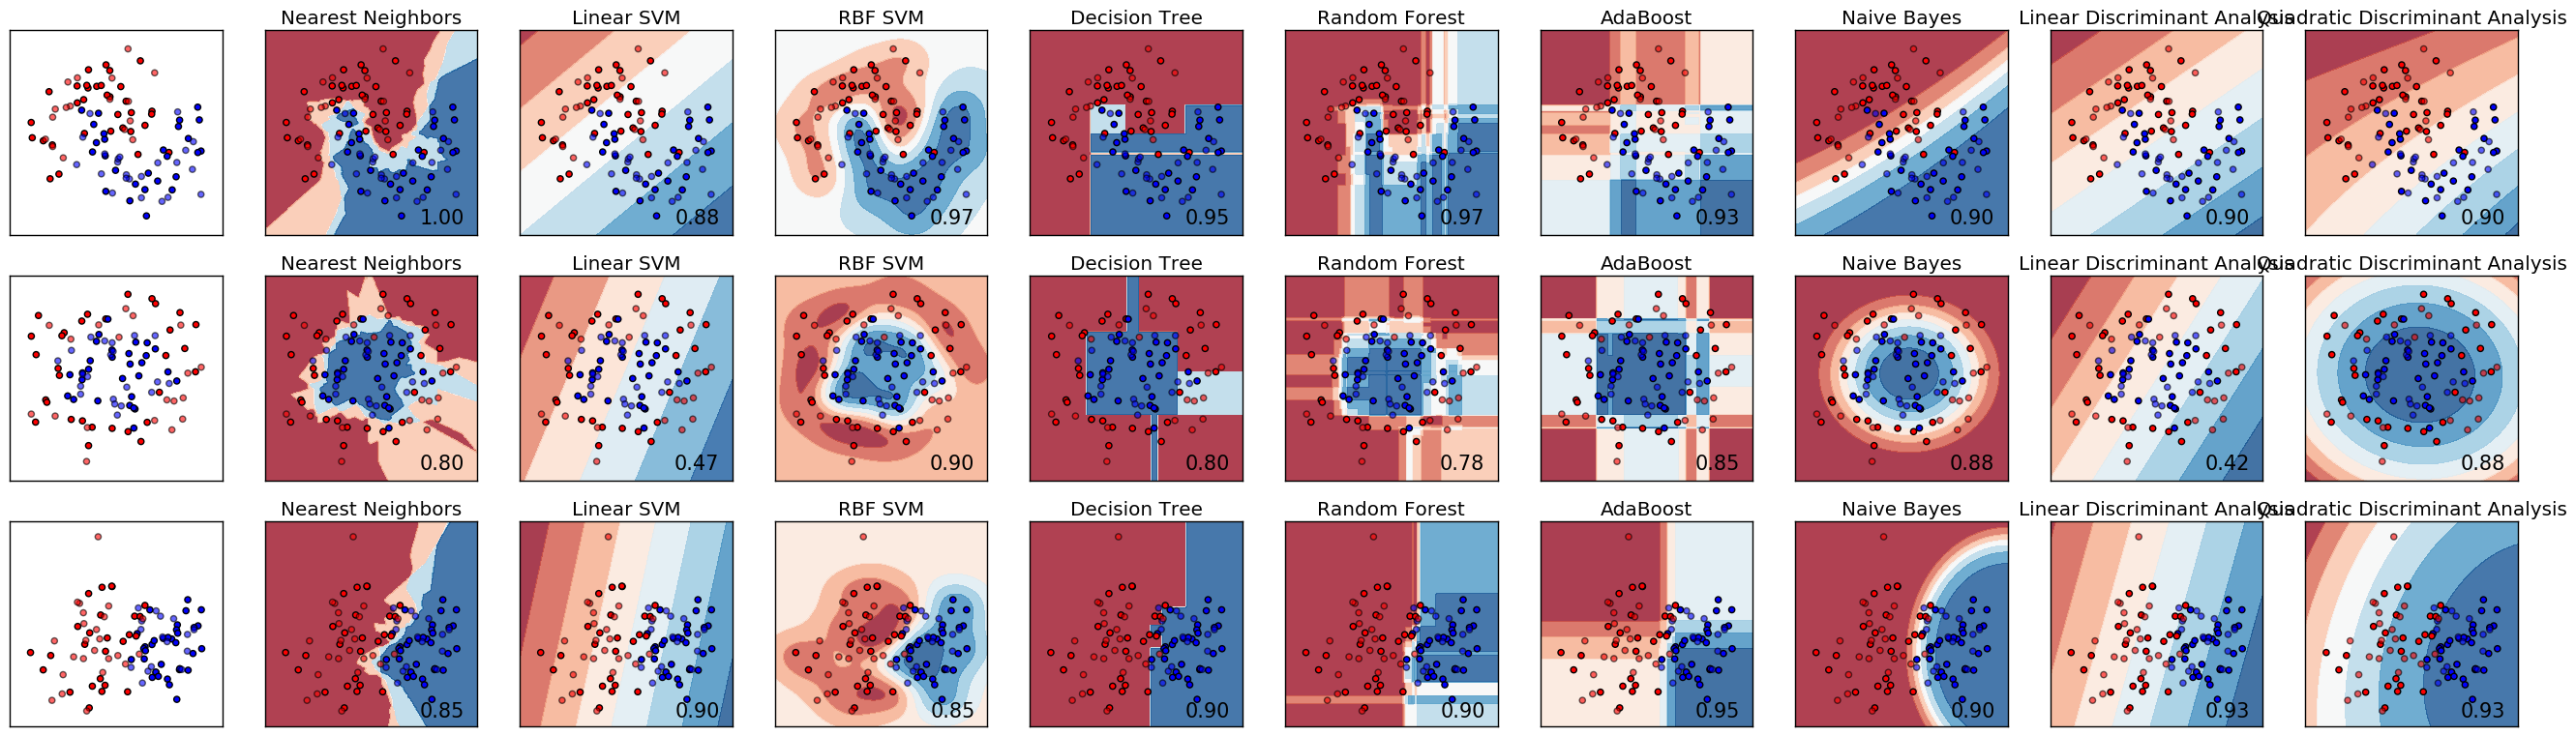

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Testing

In [3]:
@eval module Testing
using NBInclude
nbinclude(fname)
end